# Speculative RAG: Efficient Drafting and Verification







Speculative RAG (Retrieval-Augmented Generation) is a hybrid approach in which a specialized model is used for generating content drafts, while a larger, more generalized model is responsible for verifying and refining the generated drafts. This dual model system improves both the efficiency of the content generation process and the accuracy of the final output.

- **Specialized Model**: A smaller, more focused model trained to generate drafts quickly on a given subject or domain.
- **Generalized Model**: A larger, more complex model that performs verification tasks such as refining, correcting errors, and ensuring coherence across the drafts.

The process ensures that both speed and quality are optimized in the content creation process.

## Key Points of Speculative RAG

- **Efficiency & Speed**: Multiple drafts are generated simultaneously using a specialized model.

- **Accuracy & Quality**: A generalist model refines the drafts, ensuring high coherence, accuracy, and fact-checking.

- **Parallel Drafting**: Multiple drafts are created at once, speeding up the generation process.

- **Final Output**: The best draft is selected and delivered after refinement.

## How Speculative RAG Works



- **Input Text**: The process begins with loading the input text (e.g., a prompt or query).

- **Draft Generation**: A specialized model quickly generates multiple drafts based on the input, focusing on speed and relevance.

- **Parallel Drafting**: Drafts are generated simultaneously to improve processing efficiency and response time.

- **Refinement with Generalist Model**: The generalist model refines the drafts, ensuring coherence, quality, and correctness.

- **Error Checking**: The generalist model performs error checking and fact verification to ensure the drafts are accurate and free from inconsistencies.

- **Best Draft Selection**: The most accurate and relevant draft is chosen from the refined options.

- **Final Output**: The selected draft is delivered as the final output, ready for use or publishing.

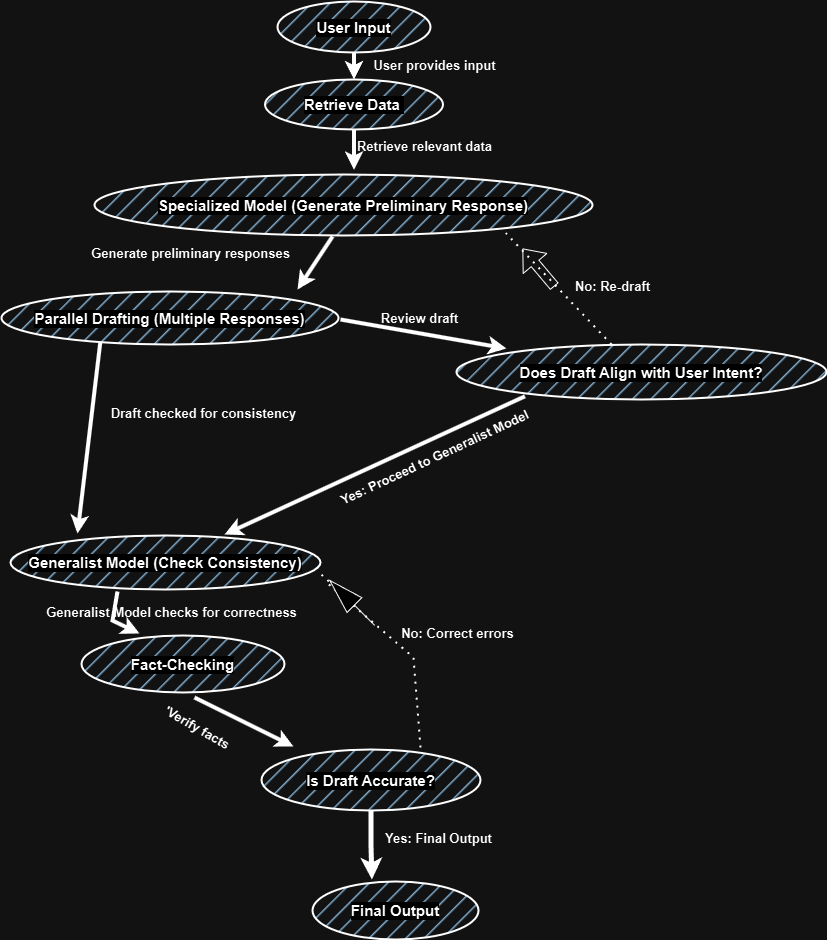

## Python Code Example for Speculative RAG

The following Python code illustrates how Speculative RAG works by creating an input file, loading the file, generating drafts using a specialized model, refining them with a generalist model, and finally selecting the best draft.



In [ ]:
!pip install PyPDF2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 13.5 MB/s eta 0:00:00


In [ ]:
!pip install groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 kB 7.1 MB/s eta 0:00:00


In [ ]:
import os
import requests
from PyPDF2 import PdfReader
from groq import Groq
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Step 0: Set up the Groq client
client = Groq(api_key="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")

In [ ]:
# Step 1: Download and Read the PDF
pdf_url = "https://arxiv.org/pdf/1810.04805.pdf"  # Example: BERT paper
pdf_path = "BERT_paper.pdf"

In [ ]:
response = requests.get(pdf_url)
with open(pdf_path, 'wb') as pdf_file:
    pdf_file.write(response.content)

In [ ]:
reader = PdfReader(pdf_path)
text = ""
for page in reader.pages:
    text += page.extract_text()

In [ ]:
# Step 2: Preprocess Text into Chunks
chunk_size = 1000
chunks = [text[i:i + chunk_size] for i in range(0, len(text), chunk_size)]
print(f"Number of chunks created: {len(chunks)}")

Number of chunks created: 65


In [ ]:
# Step 3: Convert Chunks into Embeddings (Simulating using TF-IDF)
vectorizer = TfidfVectorizer()
chunk_embeddings = vectorizer.fit_transform(chunks)

In [ ]:
# Step 4: Retrieve Relevant Chunks for Query
query = "what is Next Sentence Prediction (NSP)?"

In [ ]:
query_embedding = vectorizer.transform([query])
similarities = cosine_similarity(query_embedding, chunk_embeddings).flatten()

In [ ]:
top_k = 3  # Retrieve top 3 most relevant chunks
top_chunk_indices = similarities.argsort()[-top_k:][::-1]
retrieved_chunks = [chunks[i] for i in top_chunk_indices]

In [ ]:
# Step 5: Generate Multiple Drafts Using a Specialized Model
drafts = []
for chunk in retrieved_chunks:
    try:
        draft_response = client.chat.completions.create(
            messages=[
                {"role": "system", "content": "You are a fast drafting assistant."},
                {"role": "user", "content": f"Generate a draft based on this text:\n\n{chunk}\n\nFocus on speed and relevance."},
            ],
            model="llama3-8b-8192",
        )
        draft = draft_response.choices[0].message.content
        drafts.append(draft)
        print(f"Draft generated from chunk:\n{draft}\n")
    except Exception as e:
        print(f"Error during draft generation: {e}")

Draft generated from chunk:
Here is a draft based on the provided text:

**The Impact of Pre-Training Tasks on BERT's Performance**

Table 1 provides an insightful ablation study on the pre-training tasks used for training the BERT BASE architecture. As shown, omitting certain tasks significantly affects model performance.

* We explored the importance of deep bidirectionality in BERT by fine-tuning two pre-training objectives with identical data, scheme, and hyperparameters.
	+ **No NSP**: A bidirectional model that uses the masked language model (MLM) task without the next sentence prediction (NSP) task.
	+ **LTR & No NSP**: A left-context-only model that uses MLM but without NSP, similar to OpenAI GPT.

Ablation studies are summarized in Appendix C.

**What We Found**

We found that the absence of certain pre-training tasks significantly impairs model performance. Specifically, removing the NSP task in BERT BASE led to a decline in accuracy (84.4 → 83.9). Training without NSP and us

In [ ]:
# Step 6: Refine Drafts with Generalist Model
refined_drafts = []
for i, draft in enumerate(drafts):
    try:
        refinement_response = client.chat.completions.create(
            messages=[
                {"role": "system", "content": "You are a quality assurance assistant."},
                {"role": "user", "content": f"Refine this draft for coherence and quality:\n\n{draft}"},
            ],
            model="llama3-8b-8192",
        )
        refined_draft = refinement_response.choices[0].message.content
        refined_drafts.append(refined_draft)
        print(f"Refined Draft {i+1}:\n{refined_draft}\n")
    except Exception as e:
        print(f"Error during draft refinement: {e}")

Refined Draft 1:
Here is a refined version of the draft:

**The Impact of Pre-Training Tasks on BERT's Performance**

This study examines the influence of pre-training tasks on the performance of the BERT BASE architecture. A comprehensive ablation study, outlined in Table 1, reveals that omitting certain tasks substantially affects model accuracy.

To investigate the significance of deep bidirectionality in BERT, we conducted a fine-tuning study using two pre-training objectives with identical data, scheme, and hyperparameters.

**Experimental Setup**

We implemented two models:

* **No NSP**: A bidirectional model that utilizes the masked language model (MLM) task without the next sentence prediction (NSP) task.
* **LTR & No NSP**: A left-context-only model that employs MLM but without NSP, similar to OpenAI GPT.

The results of our ablation study are presented in Appendix C.

**Key Findings**

Our research indicates that the absence of certain pre-training tasks significantly degrad

## Explanation

### Import Libraries
- Libraries are imported for file handling, downloading, PDF reading, text processing, and AI communication.

### Set Up Groq Client
- The Groq client is initialized with an API key for API interaction.

### Download and Read PDF
- The PDF is downloaded using its URL and saved locally.
- `PdfReader` extracts the text content from the downloaded PDF.

### Preprocess Text into Chunks
- The extracted text is divided into smaller chunks of 1000 characters to facilitate analysis and processing.

### Convert Chunks into Embeddings
- TF-IDF is used to transform text chunks into vector embeddings for similarity calculations.

### Retrieve Relevant Chunks for Query
- Cosine similarity is computed between the query and each chunk's embeddings.
- The top three most relevant chunks are selected based on similarity scores.

### Corrective Validation of Retrieved Chunks
- Each retrieved chunk is sent to the Groq client for relevance and accuracy validation.
- Feedback from the validation model determines if a chunk is "accurate," "ambiguous," or "incorrect."
- Only validated chunks marked as accurate are retained for further processing.

### Generate Final Response Using Validated Knowledge
- The validated chunks are merged into a single context.
- The context and query are passed to the Groq model to generate a comprehensive response.
- If no valid chunks are found, a message indicating the inability to generate a response is displayed.

### Handle Errors
- Error handling is implemented to capture and report issues during validation or response generation.


In [ ]:
# Step 7: Select the Best Draft for Final Output
if refined_drafts:
    final_output = refined_drafts[0]  # You could implement additional logic to select the best one.
    print("\n--- Final Output ---\n")
    print(final_output)
else:
    print("No refined drafts found. Unable to generate a final output.")


--- Final Output ---

Here is a refined version of the draft:

**The Impact of Pre-Training Tasks on BERT's Performance**

This study examines the influence of pre-training tasks on the performance of the BERT BASE architecture. A comprehensive ablation study, outlined in Table 1, reveals that omitting certain tasks substantially affects model accuracy.

To investigate the significance of deep bidirectionality in BERT, we conducted a fine-tuning study using two pre-training objectives with identical data, scheme, and hyperparameters.

**Experimental Setup**

We implemented two models:

* **No NSP**: A bidirectional model that utilizes the masked language model (MLM) task without the next sentence prediction (NSP) task.
* **LTR & No NSP**: A left-context-only model that employs MLM but without NSP, similar to OpenAI GPT.

The results of our ablation study are presented in Appendix C.

**Key Findings**

Our research indicates that the absence of certain pre-training tasks significantly 

## Applications of Speculative RAG



Speculative RAG can be applied in various fields, including:

- **Content Creation**: Automating the generation of blog posts, articles, and other written content.
- **Customer Support**: Enabling chatbots to generate quick draft responses that are accurately refined.
- **Research**: Assisting researchers by generating and refining drafts for academic papers.
- **Legal Documentation**: Automatically drafting legal texts and contracts with high precision.

## Advantages of Speculative RAG



- **Enhanced Efficiency**: By generating multiple drafts simultaneously, Speculative RAG significantly reduces the time required for content creation, allowing for quicker turnaround times.
- **Superior Accuracy**: The dual-model approach ensures that drafts are not only generated quickly but also undergo rigorous verification and refinement, leading to high-quality outputs.
- **Versatility**: Speculative RAG can be adapted to a wide array of applications, from creative writing to technical documentation, making it a valuable tool across different industries.
- **Scalability**: The framework can easily scale to handle increasing volumes of content generation, accommodating the needs of both small projects and large enterprises.



## Limitations of Speculative RAG



- **Resource Demands**: The requirement for both specialized and generalist models can lead to high computational costs, necessitating robust infrastructure and resources.
- **Quality Variability**: The effectiveness of the output is contingent on the training and capabilities of the underlying models. Inadequate training data or poorly designed models can result in subpar performance.
- **Complexity in Implementation**: Integrating two distinct models into a cohesive workflow can introduce complexity in design and maintenance, requiring specialized knowledge and expertise.
- **Dependency on Data Quality**: The performance of Speculative RAG is heavily influenced by the quality of the input data. Inaccurate or biased data can lead to flawed outputs.

## Conclusion & Transition to Fusion Models



While Speculative RAG effectively merges the strengths of specialized and generalist models, the evolution continues with Fusion Models. These models aim to integrate both functionalities into a single architecture, enhancing the content generation process for even faster and more accurate results.